[**Demo %s**](#demo-upwind-directiona)

If we solve advection over $[0,1]$ with velocity $c=-1$, the right boundary is in the upwind/inflow direction. Thus a well-posed boundary condition is $u(1,t)=0$.

We'll pattern a solution after {numref}`Function {number} <function-parabolic>`. Since $u(x_m,t)=0$, we define the ODE interior problem {eq}`mol-interior` for $\mathbf{v}$ without $u_m$. For each evaluation of $\mathbf{v}'$, we must extend the data back to $x_m$ first.

In [2]:
m = 100;  c = -1;
[x, Dx] = diffmat2(m, [0, 1]);
chop = @(u) u(1:m);  
extend = @(v) [v; 0];
odefun = @(t, v) -c * chop( Dx * extend(v) );
ivp = ode(ODEFcn = odefun);
ivp.RelativeTolerance = 1e-5;
ivp.InitialTime = 0;

Now we solve for an initial condition that has a single hump.

In [3]:
u_init = exp( -80*(x - 0.5).^2 );
ivp.InitialValue = chop(u_init);
sol = solutionFcn(ivp, 0, 1);
u = @(t) [sol(t); zeros(1, length(t))];    % extend to zero at right

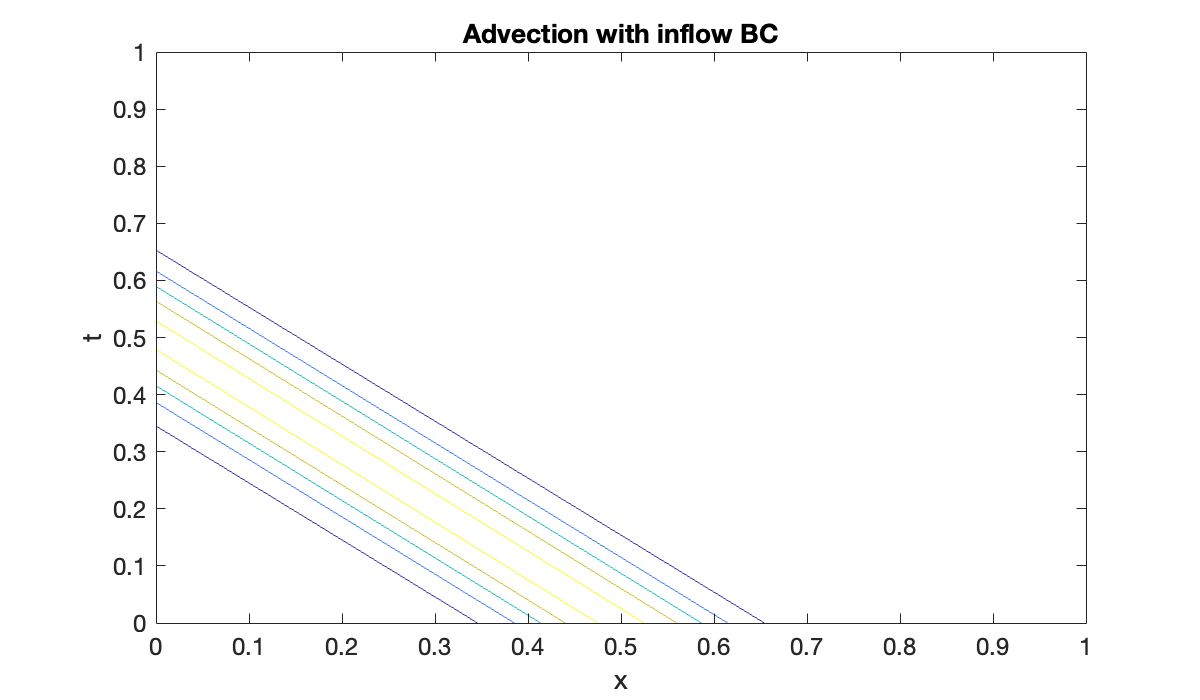

In [4]:
t = linspace(0, 1, 81);
clf,  contour(x, t, u(t)', 0.15:0.2:1)
xlabel x,  ylabel t
title('Advection with inflow BC') 

We find that the hump gracefully exits out the downwind end.

In [5]:
clf
plot(x, u(0))
hold on
axis([0, 1, -0.05, 1.05])
title('Advection with inflow BC') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("advection-inflow.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, u(t(frame)))
    str = sprintf("t = %.2f", t(frame));
    text(0.08, 0.85, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)